In [3]:
print("Latest update date is 2022/8/31",end="\n\n")
#Run me

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import copy

print("numpy version is",np.__version__)
print("matplotlib version is",matplotlib.__version__)

Latest update date is 2022/8/31

numpy version is 1.23.1
matplotlib version is 3.5.1


In [14]:
# st weighted Transform
class Transformation():
    
    def __init__(self):
        
        self.color_dict={0:"magenta",1:"dimgray",2:"cyan"}
        self.type_dict={0:"st_weighted"}
        self.type_dict_2= {v: k for k, v in self.type_dict.items()}

    def Epoch(self,T): # one iteration 
        
        w,sigma,v_h=np.linalg.svd(T)    
        sigma=np.diag(sigma) 
        v=v_h.H
        
        sigma_sq=np.sqrt(sigma)
        sigma_hat=v@sigma_sq@v_h 
        sigma_pinv=np.linalg.pinv(sigma)
        #u 확인
        if self.check_u==1:
            u=w@sigma@sigma_pinv@v_h
        else:
            u=w@v_h
        
        T_abs=v@sigma@v_h
        T_duggal=T_abs@u
        T_st=(self.s*T+self.t*T_duggal)
        
        
        return T_st #one epoch output
             
    def Transform(self,T,n=1,s=1/2,t=1/2,check_u=1): # n : iteration count 
        
        self.s=s
        self.t=t
        self.T=T
        self.n=n
        self.check_u=check_u
        
        before=copy.deepcopy(self.T)
        
        self.st=[T]
            
        for i in range(self.n):
                
            after=self.Epoch(before)
            self.st.append(after)
            before=after
            
    def Normal_calculator(self): 
        self.norm_info=[] #list of Frobenius norm of each transformation output matrix
        self.normal_info=[] #list of Frobenius norm of each transformation output matrix
        
        for j in self.st:
            norm=np.linalg.norm(j)
            distance_matrix=np.abs(j@j.H-j.H@j)
            distance=np.linalg.norm(distance_matrix)
            self.normal_info.append(distance)
            self.norm_info.append(norm)
    
    
    def Normal_plot(self): # plot that dipicts Frobenius norm of T(T^*)-(T^*)T

        self.total_fig, self.total_ax=plt.subplots(1,1)
        
        self.total_ax.plot(range(self.n+1),self.normal_info,color="b",alpha=0.5,marker="o",linestyle="dashed")
        self.total_ax.set_title("Normal Characteristic")
        
        self.total_fig.set_size_inches((16,4))
        self.total_ax.grid(axis='x', color='0.95',linestyle="--")
        
    def Process(self,k,digit=4):
        
        print("===============<START>===============\n")
        
        M=self.st[k-1]
        print(f"T_hat({k-1})\n",np.round(M,digit),"\n")
        
        w,sigma,v_h=np.linalg.svd(M)   
        sigma=np.diag(sigma) 
        v=v_h.H
        
        print("W\n",np.round(w,digit),"\n")
        print("Sigma\n",np.round(sigma,digit),"\n")
        print("V_h\n",np.round(v_h,digit),"\n")
        print("W\Sigma V^*\n",np.round(w@sigma@v_h,digit),"\n")
        print("WV^*\n",np.round(w@v_h,digit),"\n")
        print("V\n",v,"\n")
        
        sigma_sq=np.sqrt(sigma)
        sigma_hat=v@sigma_sq@v_h
        sigma_pinv=np.linalg.pinv(sigma)
        if self.check_u==1:
            u=w@sigma@sigma_pinv@v_h
            print("U=W\Sigma\Sigma_pinv V^*\n",np.round(u,digit),"\n")
        else:    
            u=w@v_h
            print("U=WV^*\n",np.round(u,digit),"\n")
        
        
        T_abs=v@sigma@v_h
        
        print("|T|\n",np.round(T_abs,digit),"\n")
        
        print("U|T|\n",np.round(u@T_abs,digit),"\n")

     
        T_duggal=T_abs@u
        print("T_duggal\n",np.round(T_duggal,digit),"\n")
        
        T_st=(self.s*M+self.t*T_abs@u)
            
        print("|T|U",np.round(T_abs@u,digit),"\n")
        print(f"T_hat({k})\n",np.round(T_st,digit),"------->(a)\n")
        
        
        print("===============<END>===============\n")
        print("result from our class  \n",np.round(self.st[k],digit),"------->(b)")
        print("If a!=b, Error.. ; If that happens, please email us")
        print("e-mail : alsdn0110@snu.ac.kr")

### Module

---

#### 1. `Transformation(T,n,s,t)` : iterate n times for transformation.( $T_{st}=s T+t |T|U$ ).

- Parameters
    
    `T` : matrix (`numpy.Matrix`)
    
    `n` : number of iteration
    
    `s,t` : Weight (default : Mean Transform where s=t=$\frac{1}{2}$)


- Return

   The transformed Matrices are stored in list : `Transfomation.st`
     
#### 2. `Transfomation.Normal_calculator()` : Norm and Normality Calculation Function.

where norm is *Frobenius norm*.

- `Transfomation.norm_info` : A list in which the norm of the Transformation is stored.
   
- `Transfomation.normal_info` : A list in which normal characteristic - $|T^{*}T-TT^{*}| - $ is stored.

---

#### 3.` Transformation.Process(k)` : You can check the calculation process of a specific part.
    
- Parameters

   `k` : purpose number of repetitions ($1<=k<=n$)


- Return

    Yield proceess transforms From $T^{(k-1)}$ to $T^{(k)}$

---

#### 4. `Transformation.Plot()` : plotting of normal characteristic.
   
- axis X : number of iteration(`n`)
   
- axis Y : normal characteristic for transformations.

---
*Min Woo Park : Graduate School of Data Science, Seoul National University* - alsdn0110@snu.ac.kr 

*Ji Eun Lee : Department of Mathematics and Statistics, Sejong university* - jieunlee@sejong.ac.kr

### Examples In Paper

---


===============<START>===============

T_hat(0)
 [[0 1]
 [0 0]] 

W
 [[1. 0.]
 [0. 1.]] 

Sigma
 [[1. 0.]
 [0. 0.]] 

V_h
 [[ 0.  1.]
 [-1.  0.]] 

W\Sigma V^*
 [[0. 1.]
 [0. 0.]] 

WV^*
 [[ 0.  1.]
 [-1.  0.]] 

V
 [[ 0. -1.]
 [ 1.  0.]] 

U=W\Sigma\Sigma_pinv V^*
 [[0. 1.]
 [0. 0.]] 

|T|
 [[0. 0.]
 [0. 1.]] 

U|T|
 [[0. 1.]
 [0. 0.]] 

T_duggal
 [[0. 0.]
 [0. 0.]] 

|T|U [[0. 0.]
 [0. 0.]] 

T_hat(1)
 [[0.  0.5]
 [0.  0. ]] ------->(a)

===============<END>===============

result from our class  
 [[0.  0.5]
 [0.  0. ]] ------->(b)
If a!=b, Error.. ; If that happens, please email us
e-mail : alsdn0110@snu.ac.kr


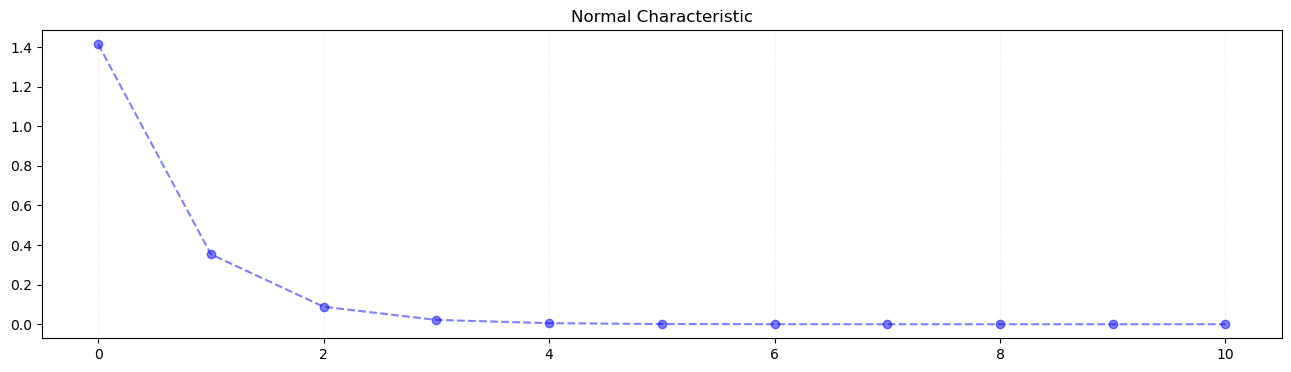

In [15]:
#example 2.4

T = np.matrix([[0,1,0,0]]).reshape(2,2)

Ex_1=Transformation() 

Ex_1.Transform(T,n=10,s=0.5,t=0.5) # 행렬, 반복횟수, s,t

Ex_1.Normal_calculator() 

Ex_1.Normal_plot() 

#Ex_1.st

#Ex_1.norm_info

#Ex_1.normal_info[-1]

Ex_1.Process(k=1)

#0829 comment : U값 확인



Input
 [[0.  0.5]
 [0.  1. ]] 

W
 [[ 0.4472 -0.8944]
 [ 0.8944  0.4472]] 

Sigma
 [[1.118 0.   ]
 [0.    0.   ]] 

V_h
 [[ 0.  1.]
 [-1.  0.]] 

W\Sigma V^*
 [[0.  0.5]
 [0.  1. ]] 

WV^*
 [[ 0.8944  0.4472]
 [-0.4472  0.8944]] 

V
 [[ 0. -1.]
 [ 1.  0.]] 

U=W\Sigma\Sigma_pinv V^*
 [[0.     0.4472]
 [0.     0.8944]] 

|T|
 [[0.    0.   ]
 [0.    1.118]] 

U|T|
 [[0.  0.5]
 [0.  1. ]] 

T_duggal
 [[0. 0.]
 [0. 1.]] 

|T|U [[0. 0.]
 [0. 1.]] 

T_st(a)
 [[0.   0.25]
 [0.   1.  ]] 

result from our class(b)
 [[0.   0.25]
 [0.   1.  ]]
If a!=b, Error.. ; If that happens, please email us
e-mail : alsdn0110@snu.ac.kr


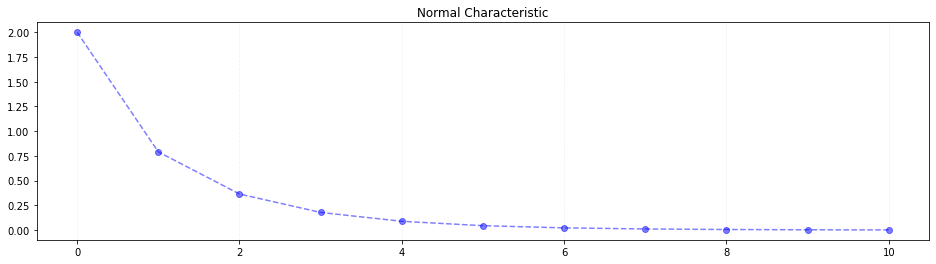

In [3]:
#example 2.5

T = np.matrix([[0,1,0,1]]).reshape(2,2)

Ex_2=Transformation() 

Ex_2.Transform(T,n=10,s=0.5,t=0.5) # 행렬, 반복횟수, s,t

Ex_2.Normal_calculator() 

Ex_2.Normal_plot() 

Ex_2.Process(k=2)

#0829 comment : U, |T| 값 확인




5 페이지 we have... 부분 기호 정리 요망

In [38]:
#proposition 2.11
#우리의 polar decomposition 정의에서는 조금 다르다.

T = np.matrix([[1,2,3,4]]).reshape(2,2)

Ex_2=Transformation() 

Ex_2.Transform(T,n=10,s=0.5,t=0.5,check_u=1) # 행렬, 반복횟수, s,t

Ex_2.Normal_calculator() 

#Ex_2.Normal_plot() 

Ex_2.Process(k=1)

#0829 comment : U, |T| 값 확인
Ex_2.normal_info



Input
 [[1 2]
 [3 4]] 

W
 [[-0.4046 -0.9145]
 [-0.9145  0.4046]] 

Sigma
 [[5.465 0.   ]
 [0.    0.366]] 

V_h
 [[-0.576  -0.8174]
 [ 0.8174 -0.576 ]] 

W\Sigma V^*
 [[1. 2.]
 [3. 4.]] 

WV^*
 [[-0.5145  0.8575]
 [ 0.8575  0.5145]] 

V
 [[-0.57604844  0.81741556]
 [-0.81741556 -0.57604844]] 

U=W\Sigma\Sigma_pinv V^*
 [[-0.5145  0.8575]
 [ 0.8575  0.5145]] 

|T|
 [[2.058 2.401]
 [2.401 3.773]] 

U|T|
 [[1. 2.]
 [3. 4.]] 

T_duggal
 [[1. 3.]
 [2. 4.]] 

|T|U [[1. 3.]
 [2. 4.]] 

T_st(a)
 [[1.  2.5]
 [2.5 4. ]] 

result from our class(b)
 [[1.  2.5]
 [2.5 4. ]]
If a!=b, Error.. ; If that happens, please email us
e-mail : alsdn0110@snu.ac.kr


[8.246211251235321,
 6.217248937900877e-15,
 4.440892098500626e-15,
 3.076740298213702e-15,
 0.0,
 5.102196573270515e-15,
 0.0,
 4.699798436761765e-15,
 0.0,
 0.0,
 0.0]

In [52]:
T=np.matrix([[1,2],[3,4]])
w,s,v_t=np.linalg.svd(T)
s=np.diag(s)
v=v_t.H
a=w@s@s@w.H-v@s@s@v.H


#x=1/2*(v@s@v_t@w@s@np.linalg.pinv(s)@v_t+T)

#np.linalg.det(x@x.H-x.H@x)

1.0

## 10/10 랜덤한 숫자에 대하여 st mean tf 가 정규성을 만족할까?

[10.367459978972517, 170.98041732910593, -236.00676139962638, 521.7090378314491]
break at  1  by  2.949632099894761e-05


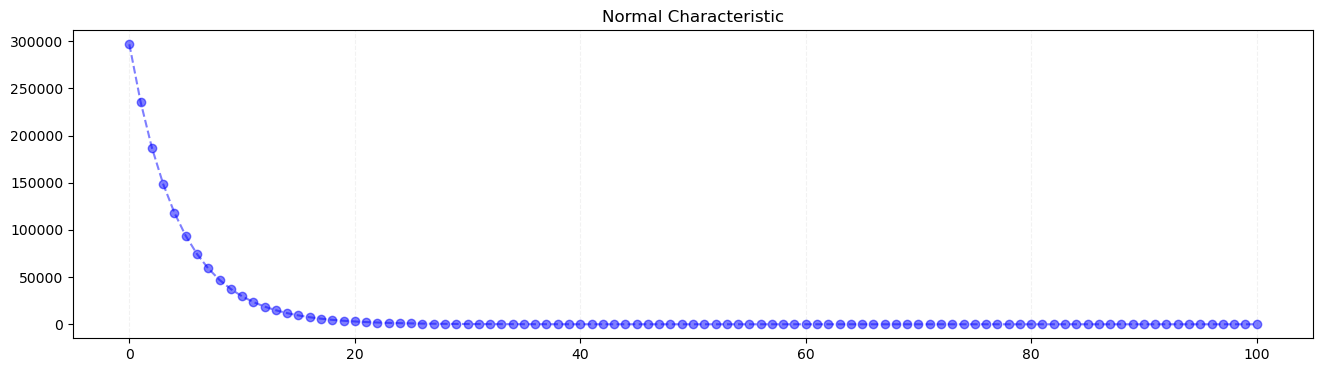

In [9]:
import random

thres_hold=1e-10

for cycle in range(100):

    sample=[]
    for _ in range(4):
        p=random.random() # 0~1 랜덤하게 뽑고
        logit=np.log(p/(1-p)) # 로그오즈 -> -inf ~ inf 
        
        n=random.randint(1,100) # 스케일더크게
        sample.append(logit*n)
    
    T = np.matrix([[sample[0],sample[1],sample[2],sample[3]]]).reshape(2,2)

    Ex=Transformation() 

    Ex.Transform(T,n=100,s=0.5,t=0.5,check_u=1) # 행렬, 반복횟수, s,t

    Ex.Normal_calculator()
    
    if thres_hold<Ex.normal_info[-1]:
        print(sample)
#         print(Ex.normal_info)
        print('break at ',cycle," by ",Ex.normal_info[-1])
        Ex.Normal_plot()
        break
    
    




## 포인트에 오버피팅하는 연속함수를 만들고 그 함수가 감소함수임을 보이자. 감소함수 + 바운디드 